# Prosjekt lemur

Vi har valgt en oppgave om lemurene i Madagaskar!

<img src="https://secure.i.telegraph.co.uk/multimedia/archive/02647/lemur_2647603b.jpg" width=50%>

Datasettet vi jobbet med inneholdt informasjon om Madagaskar-lemurene og deres hverdag. Informasjonen fikk vi gitt i en 'csv'-fil. Der hver rad i datasettet beskriver lemurenes rute, hvilket år, hvilken tid, hva slags arter og gruppestørrelsen de ble oppservert i. Alle disse "variabler" eller "features" er listet opp med beskrivelse i tabellen under. 

I denne oppgaven skal jeg aller først lese av fila og undersøke den. Så skal jeg prøve å fremstille en modell som kan hjelpe oss å undersøke lemurpopulasjonen på Mdagaskar, gitt de variablene som finnes i csv-filen. I prossenen kan vi stille spørsmål som feks. Er det noe forskjell på lemurforekomsten i Mariano og Matsedroy? Hva kan vi si om lemurpopulsjonene i dette området? Og er det noe utvikling over tid eller lemurtype sortert etter tidspunkt på dagen.

In [15]:
import sys
print("\\".join(sys.executable.split("\\")[:-1]) + "\\Library\\bin\\graphviz")

\Library\bin\graphviz


In [16]:
# Importerer pandas biblioteket
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus as pydot
from IPython.display import Image
%matplotlib inline

# Leser dataen
titanic = pd.read_csv("Lemur.csv")

In [17]:
import pandas as pd
lemur = pd.read_csv("Lemur.csv", sep=";")

In [27]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

Datasettet er lagret og vi har lastet det opp i en panda data struktur, dataframe, som ser ut som en tabell. Vårt ser sånn her ut:

In [18]:
lemur.head()

,Year,Time started,Route,Species,Group size
0,2015,19:00,Mariarano_R1,Avahi occidentalis,1
1,2015,19:00,Mariarano_R1,Avahi occidentalis,1
2,2015,19:00,Mariarano_R1,Avahi occidentalis,1
3,2015,19:20,Mariarano_R1,Avahi occidentalis,1
4,2015,19:20,Mariarano_R1,Avahi occidentalis,1


In [19]:
lemur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 5 columns):
Year            3185 non-null int64
Time started    3184 non-null object
Route           3185 non-null object
Species         3185 non-null object
Group size      3185 non-null int64
dtypes: int64(2), object(3)
memory usage: 124.5+ KB


In [23]:
lemur.tail()

,Year,Time started,Route,Group size
3180,2017,07:13,Matsedroy_R4,1
3181,2017,07:13,Matsedroy_R4,1
3182,2017,07:23,Matsedroy_R4,1
3183,2017,07:10,Matsedroy_R4,5
3184,2017,07:20,Matsedroy_R4,2


Det ser bra ut. Vi har alle kolonnene vi trenger, og hver av radene samsvarer med hverandre og året. 
Renamer kolonnene så jeg kan referere til de senere:

In [31]:
lemur.columns = ['year', 'time started', 'route', 'group size']

Så utforsker jeg datasettet litt til, for å sjekke at pandas leste det riktig og at det ikke er noen manglende verdier. 

In [33]:
len(lemur)

3185

Det ser bra ut. Nå skal jeg se om datasettet ble importert riktig. 

In [34]:
lemur.dtypes

year             int64
time started    object
route           object
group size       int64
dtype: object

Ops! Det ser ut som at det er noe feil med to av kolonnene. Det burde vært float, så må ta en sjekk på verdiene. 

In [41]:
non_numberic_route = lemur.route.str.contains('[^0-9.-]')
lemur.loc[non_numberic_route].head()

,year,time started,route,group size
0,2015,19:00,Mariarano_R1,1
1,2015,19:00,Mariarano_R1,1
2,2015,19:00,Mariarano_R1,1
3,2015,19:20,Mariarano_R1,1
4,2015,19:20,Mariarano_R1,1


In [43]:
set(lemur.route[non_numberic_route])

{'Mariarano_R1',
 'Mariarano_R2',
 'Mariarano_R3',
 'Mariarano_R4',
 'Matsedroy_R1',
 'Matsedroy_R2',
 'Matsedroy_R3',
 'Matsedroy_R4'}

Etter å ha studert datasettet, prøver jeg meg litt frem ved å se på de forskejllige kolonnene og undersøker om det er kolonner man kan klare å lage modeller uten. Da dropper jeg den bare fra datasettet, ved å bruke  dataframe.pop(kolonne) eller drop.

In [20]:
lemur.pop('Species')

0          Avahi occidentalis
1          Avahi occidentalis
2          Avahi occidentalis
3          Avahi occidentalis
4          Avahi occidentalis
5          Avahi occidentalis
6          Avahi occidentalis
7          Avahi occidentalis
8          Avahi occidentalis
9          Avahi occidentalis
10         Avahi occidentalis
11         Avahi occidentalis
12         Avahi occidentalis
13         Avahi occidentalis
14         Avahi occidentalis
15         Avahi occidentalis
16         Avahi occidentalis
17         Avahi occidentalis
18         Avahi occidentalis
19         Avahi occidentalis
20         Avahi occidentalis
21         Avahi occidentalis
22         Avahi occidentalis
23         Avahi occidentalis
24         Avahi occidentalis
25         Avahi occidentalis
26         Avahi occidentalis
27         Avahi occidentalis
28         Avahi occidentalis
29         Avahi occidentalis
                ...          
3155    Propithecus coquereli
3156    Propithecus coquereli
3157    Pr

Tester ut en modell med det litt forenklede datasettet:

In [60]:
import csv
with open('lemur.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_NONE)
    spamwriter.writerow([str(1.1112233), str(1.3355)])

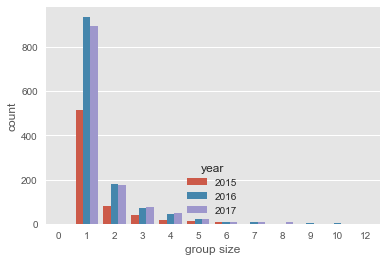

In [68]:
sns.countplot(x='group size', hue='year', data=lemur)

In [128]:
import sys
print("\\".join(sys.executable.split("\\")[:-1]) + "\\Library\\bin\\graphviz")

\Library\bin\graphviz


Fra denne lille modellen kan vi lese av år og gruppestørrelsen til lemurene som ble observert. 